# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #0.72 Accuracy
from sklearn.tree import DecisionTreeClassifier #0.05 Accuracy
from sklearn.tree import DecisionTreeRegressor #0.61 Accuracy
from sklearn.ensemble import RandomForestRegressor  #0.76 Accuracy
from sklearn.ensemble import RandomForestClassifier #0.08 Accuracy
from sklearn.linear_model import LogisticRegression #0.01 Accuracy
from sklearn.linear_model import Lasso #0.72 Accuracy
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle
import json
import flask

# Importing Datasets

In [ ]:
laptop_data=pd.read_csv("Cleaned_Laptop_data.csv")
pd.reset_option('max_columns')

# Exploring Dataset

In [ ]:
table_columns=laptop_data.columns
#for i in table_columns:
#  print("\n"+i+"\n")
#  print(laptop_data[i].unique())
laptop_data.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


## Learnings from the table


*   Dataset has no null values but have "Missing" as a value ✔

*   In "processor_gnrtn"(Processor Generation), ("th") needs to be removed ✔

*   In "processor_gnrntn", there is a value "Missing" ✔

*   In "model", there is a value "Missing" ✔

*   In "ram_gb", ("GB GB") needs to be removed ✔

*   In "SSD", ("GB") needs to be removed ✔   

*   In "HDD", ("GB") needs to be removed ✔

*   In "os_bits", (-bit) needs to be removed ✔

*   In "display_size", there is a value "Missing" ✔

*   In "old_price", there is a value 0 ✔

*   Appearantly there are some outliers in table(old_price) ✔


# Cleaning The Dataset

In [ ]:
#Dealing with "processor_gnrtn" Values
laptop_data2=laptop_data.copy()
laptop_data2.replace({"processor_gnrtn":"th"},"",regex=True,inplace=True)
laptop_data2["processor_gnrtn"]=laptop_data2["processor_gnrtn"].replace("Missing",0)
laptop_data2["processor_gnrtn"]=laptop_data2["processor_gnrtn"].astype("int64")
laptop_data2["processor_gnrtn"]=laptop_data2["processor_gnrtn"].replace(0,10)

In [ ]:
#Dealing with "ram_gb" Values
laptop_data3=laptop_data2.copy()
laptop_data3.replace({"ram_gb":"GB GB"},"",regex=True,inplace=True)
laptop_data3["ram_gb"]=laptop_data3["ram_gb"].astype("int64")

In [ ]:
#Dealing with "ssd" Values
laptop_data4=laptop_data3.copy()
laptop_data4.replace({"ssd":"GB"},"",regex=True,inplace=True)
laptop_data4["ssd"]=laptop_data4["ssd"].astype("int64")

In [ ]:
#Dealing with "hdd" Values
laptop_data5=laptop_data4.copy()
laptop_data5.replace({"hdd":"GB"},"",regex=True,inplace=True)
laptop_data5["hdd"]=laptop_data5["hdd"].astype("int64")

In [ ]:
#Dealing with "os_bit" Values
laptop_data6=laptop_data5.copy()
laptop_data6.replace({"os_bit":"-bit"},"",regex=True,inplace=True)
laptop_data6["os_bit"]=laptop_data6["os_bit"].astype("int64")

In [ ]:
#Dealing with "display_size" Values
laptop_data7=laptop_data6.copy()
laptop_data7["display_size"]=laptop_data7["display_size"].replace("Missing",0)
laptop_data7["display_size"]=laptop_data7["display_size"].astype("float32")
laptop_data7["display_size"]=laptop_data7["display_size"].replace(0,14.0)

In [ ]:
#Dealing with old_price column
laptop_data8=laptop_data7.copy()
laptop_data8['old_price'] = np.where(laptop_data8['old_price'] == 0, laptop_data8['latest_price'],laptop_data8['old_price'])

# Removing Unnecessary Columns

In [ ]:
#Removing Straight Forward unnecessary Columns
laptop_data9=laptop_data8.copy()
laptop_data9.drop(columns=["model","reviews","ratings","star_rating","discount","latest_price","warranty","msoffice"],inplace=True)

# Visualizing the effect of different columns on price
I have Visualized effect of all columns on prices in **Power Bi** and come up with following conclusions

In [ ]:
#Downloading Data as .csv format to visualize it in PowerBI
laptop_data9.to_csv("laptop_data_for_visualization.csv")

## Conclusions from the Visuals (In PowerBI)

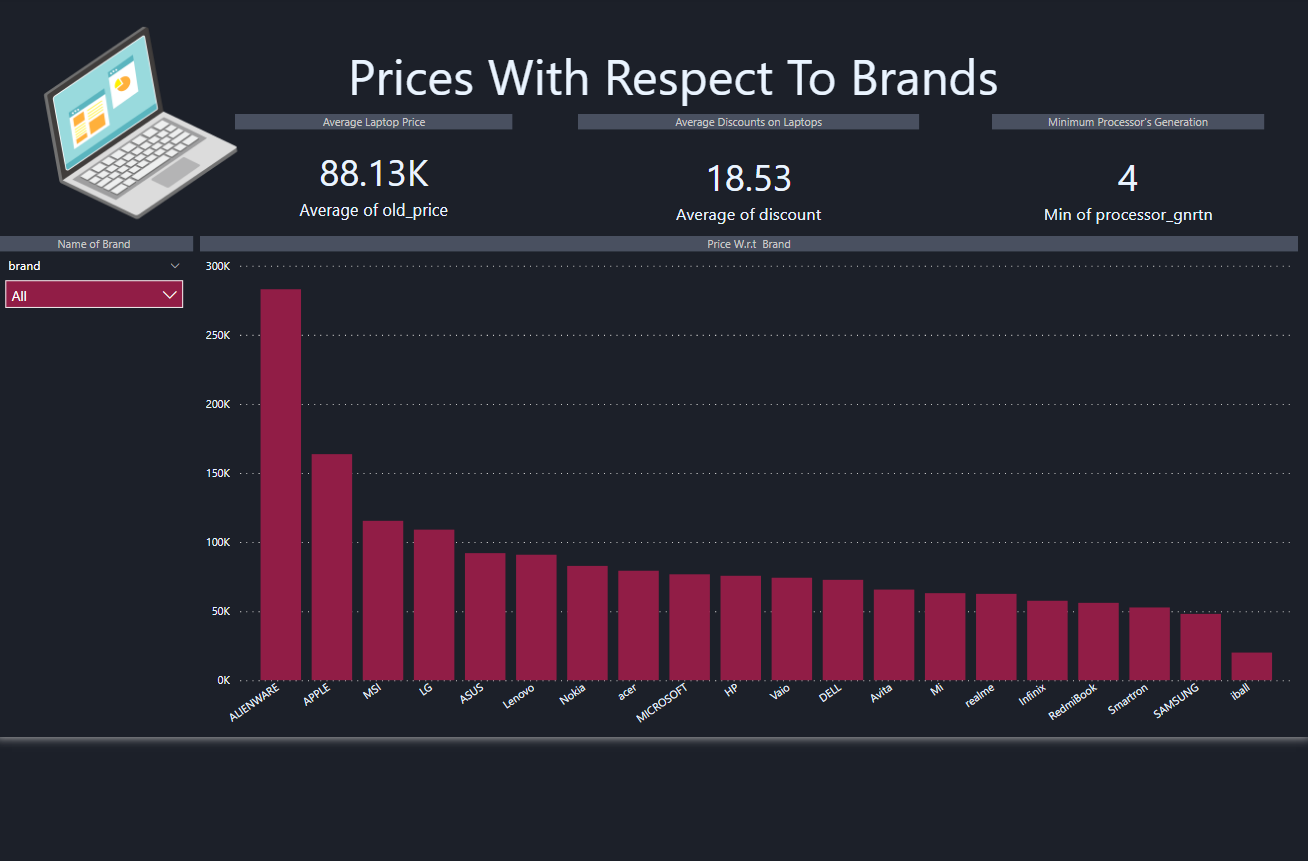

*   "AlienWare" Brand have most expensive laptops but very less in quantity

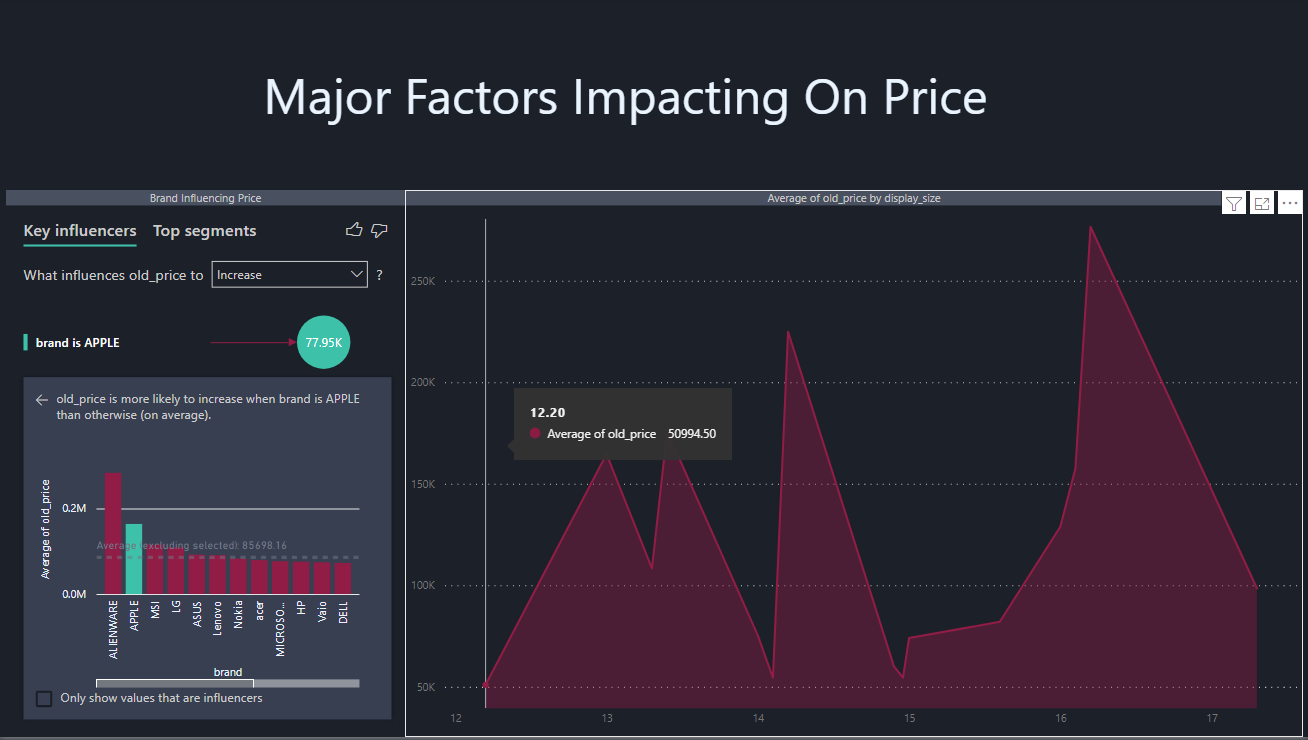

* "Apple" Brand have impact on Prices
* Between 15.00 & 16.20 Display Screen Size Price is increasing drastically
* At 14.20 Display size, Price is high(224k) and at 14.96 Display size, Price suddenly goes falls(54K) **So Display size doesnot have huge impact on Price**

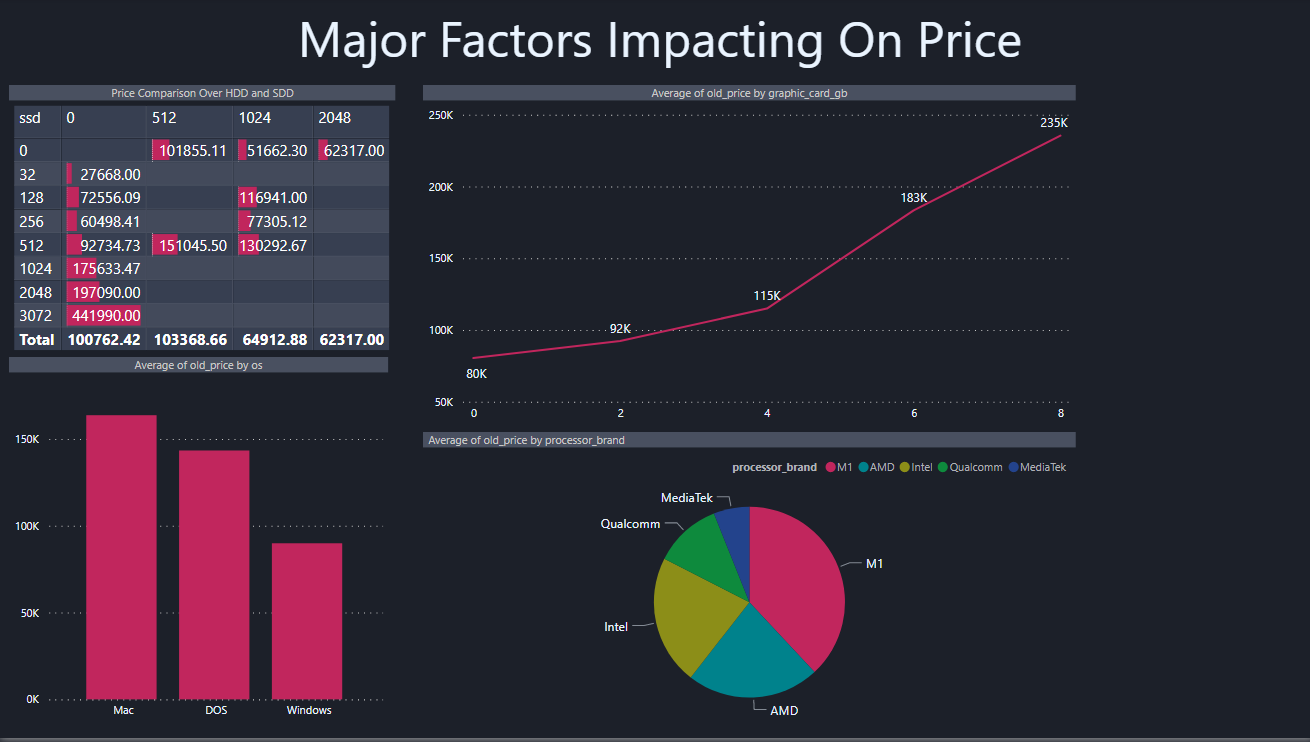


*   SSD has higher price than HDD(More SSD increase,more price increase)
*   More the GB of graphic card, more the price is'
*   Mac is most expensive OS,Windows is most cheapest OS
*   Laptop with M1 processor brand are most expensive

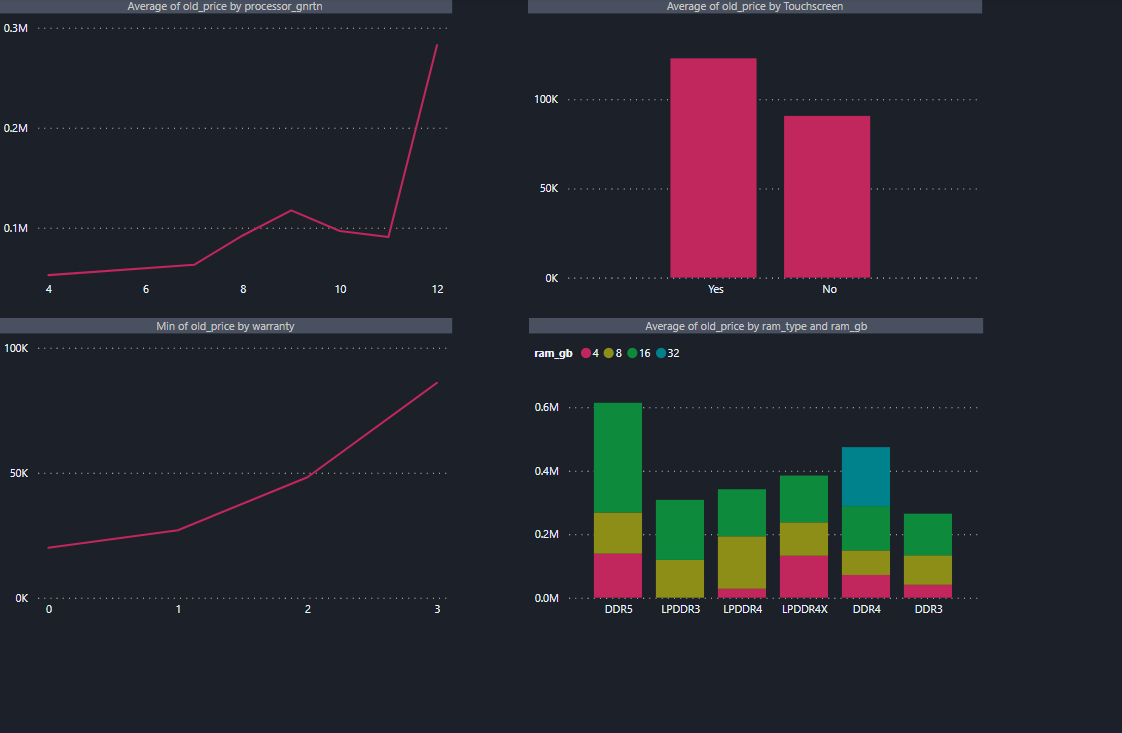

*   12 Processor Generation has maximum price (More Processor Generation = More price)
*   Laptops with touchscreens are more expensive
*   Warranty of 2 years has price of 89K and warranty of 1 year has price of 95K,so warranty might not have impact on price
*   DDR 5 RAM has maximum price while only DDR4 provide 32 GB of size




# Dealing with Categorical Columns

In [ ]:
#Dealing with brand Columns
brand_dummies=pd.get_dummies(laptop_data9["brand"])
laptop_data10=pd.concat([laptop_data9,brand_dummies],axis="columns")
laptop_data10.drop(columns=["brand","realme"],inplace=True)

In [ ]:
#Dealing with brand Columns
processor_brand_dummies=pd.get_dummies(laptop_data10["processor_brand"])
laptop_data11=pd.concat([laptop_data10,processor_brand_dummies],axis="columns")
laptop_data11.drop(columns=["processor_brand","Qualcomm","processor_name"],inplace=True)

In [ ]:
#Dealing with ram_type
ram_type_dummies=pd.get_dummies(laptop_data11["ram_type"])
laptop_data12=pd.concat([laptop_data11,ram_type_dummies],axis="columns")
laptop_data12.drop(columns=["ram_type","LPDDR4X"],inplace=True)

In [ ]:
#Dealing with os
os_dummies=pd.get_dummies(laptop_data12["os"])
laptop_data13=pd.concat([laptop_data12,os_dummies],axis="columns")
laptop_data13.drop(columns=["os","Windows"],inplace=True)

In [ ]:
#Dealing with weight
weight_dummies=pd.get_dummies(laptop_data13["weight"])
laptop_data14=pd.concat([laptop_data13,weight_dummies],axis="columns")
laptop_data14.drop(columns=["weight","Gaming"],inplace=True)

In [ ]:
#Dealing with Touchscreen
laptop_data15=laptop_data14.copy()
laptop_data15.replace({"Touchscreen":"Yes"},1,inplace=True)
laptop_data15.replace({"Touchscreen":"No"},0,inplace=True)

# Dealing with Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


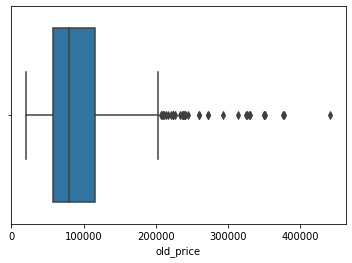

In [ ]:
sns.boxplot(laptop_data15["old_price"])
laptop_data16=laptop_data15[laptop_data15["old_price"]<=150000]

Text(0, 0.5, 'Count')

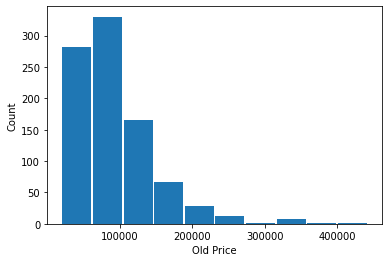

In [ ]:
plt.hist(laptop_data15["old_price"],rwidth=0.95)
plt.xlabel("Old Price")
plt.ylabel("Count") #Right Skewed

# Model Building

In [ ]:
# In x variable data that will be used to predict price will be stored
# In y variable data that have to be predicted will be stored
x= laptop_data15.drop(columns=["old_price"])     #Independent Features
y= laptop_data15["old_price"] #Dependent Columns

In [ ]:
#Splitting Data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
model=Lasso()
parameters={"alpha":[1.0,5.0,10.0,50.0]}
#model.fit(x_train,y_train)
#model.predict(x_test)
#model.score(x_test,y_test)
#Using Grid Search CV
clf = GridSearchCV(model, parameters,cv=3)
clf.fit(x_train,y_train)
predict=clf.predict(x_test)
df=pd.DataFrame(clf.cv_results_)

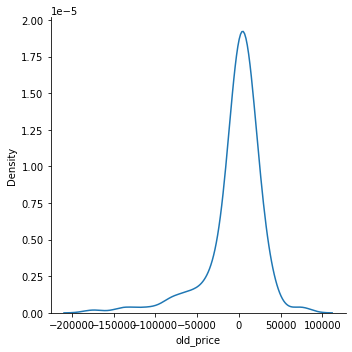

In [ ]:
sns.displot(predict-y_test,kind="kde")

In [ ]:
df.columns
df[["params","mean_test_score"]]

In [ ]:
#Finding best accuracy and exporting best model parameters
scores=[]
for i in range(1,100):
  model=RandomForestRegressor()
  model.fit(x_train,y_train)
  model.predict(x_test)
  score=model.score(x_test,y_test)
  scores.append(score)
  if(i==99):
    df_of_score = pd.DataFrame(scores)
    df_of_score = df_of_score.rename(columns={0:"Scores"})
    efficient_model_score = df_of_score["Scores"].max()
    efficient_model_score
    if(score==efficient_model_score):
      with open("Laptop price determinator max.pickle","wb") as f:
        pickle.dump(model,f)

In [ ]:
with open('Laptop price determinator max.pickle','rb') as f:
    x = pickle.load(f)

In [ ]:
x.score(x_test,y_test)

In [ ]:
#Exporting columns used for prediction
columns={
    'data_columns' : [col.lower() for col in x.columns]
        }
with open("Laptop price determinator Columns.json","w") as f:
  f.write(json.dumps(columns))

In [ ]:
#Using K-Fold Validation
#shuffle_split = ShuffleSplit(n_splits=10,test_size=0.2,random_state=10)
#cv_score=cross_val_score(RandomForestRegressor(),x,y,cv=shuffle_split)